# 1. Import Library & Inisialisasi Path

In [2]:
# Import library

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import random
import numpy as np
import pandas as pd

In [3]:
# Melakukan inisialisasi path untuk gambar

train_dir = "./images/images/training"
test_dir = "./images/images/test"

# 2. Load data dan visualisasi

In [5]:
# Membuat function untuk melakukan load img

def load_img(img_dir):
    p = Path(img_dir)
    dirs = p.glob("*")
    
    img_list = []
    
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            
            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [6]:
# Melakukan load gambar training

train_img = load_img(train_dir)

In [9]:
# Melakukan pengecekan data ada label dan feature atau tidak
train_img[0]

(array([[[173, 181, 184],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [145, 153, 156],
         [148, 156, 159],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        ...,
 
        [[ 42,  42,  34],
         [ 29,  29,  21],
         [ 23,  23,  15],
         ...,
         [ 33,  28,  24],
         [ 35,  30,  26],
         [ 36,  31,  27]],
 
        [[ 45,  45,  37],
         [ 32,  32,  24],
         [ 24,  24,  16],
         ...,
         [ 31,  26,  22],
         [ 33,  28,  24],
         [ 35,  30,  26]],
 
        [[ 48,  48,  40],
         [ 34,  34,  26],
         [ 25,  25,  17],
         ...,
         [ 29,  24,  20],
  

In [10]:
# Melakukan pengecekan ukuran gambar secara acak

pick_random = np.random.randint(0, len(train_img))

# Menampilkan ukuran image
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 239
(531, 800, 3)


In [11]:
# Melakukan visualisasi gambar

def random_img_vis(img_list):
    rand_num = np.random.randint(0, len(img_list))
    
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    
    plt.imshow(img)
    print(f'Shape: {img.shape}')
    print(f'Label: {label}')
    

Shape: (469, 640, 3)
Label: night


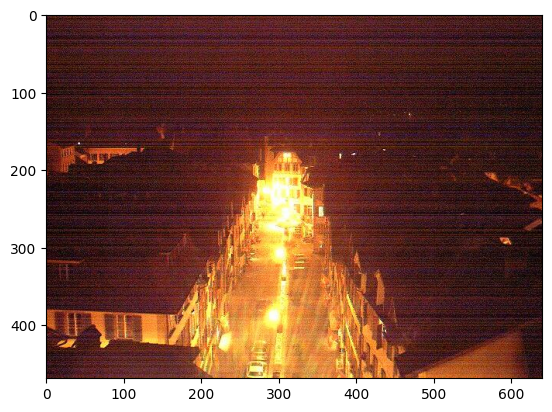

In [15]:
# Menampilkan gambar secara acak
random_img_vis(train_img)

# 3. Pra Pengolahan Data

In [16]:
# Membuat function untuk melakukan standarisasi gambar

def standardize_img(img):
    # Melakukan resize gambar 1100 x 600
    std_img = cv.resize(img, (1100, 600))
    
    return std_img

In [17]:
# Membuat function untuk melakukan encoding terhadap label day dan night

def label_encoder(label):
    # Python akan melakukan return 1 jika label adalah day, jika selain day akan return 0
    return 1 if label == 'day' else 0

In [18]:
# Function untuk menggabungkan seluruh proses pre processing gambar

def preprocess_img(img_list):
    std_img_list = []
    
    for item in img_list:
        image = item[0]
        label = item[1]
        
        # Standarisasi image
        std_img = standardize_img(image)
        
        # Encoding label
        encoded_label = label_encoder(label)
        
        # Menambahkan std image dan encoded label ke dalam list
        std_img_list.append((std_img, encoded_label))
    
    return std_img_list
    

In [19]:
# Melakukan pra pengolahan data

train_std_img_list = preprocess_img(train_img)

In [23]:
# Melakukan pengecekan data setelah di pre processing

pick_random = np.random.randint(0, len(train_std_img_list))

print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 189
(600, 1100, 3)


Shape: (600, 1100, 3)
Label: 0


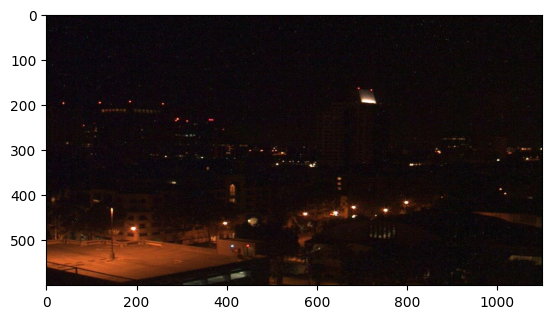

In [27]:
# Menampilkan gambar secara acak yang sudah dilakukan standarisasi

random_img_vis(train_std_img_list)

# 4. Ekstraksi Fitur

In [28]:
# Function untuk mendapatkan avg brightness

def avg_brightness(img):
    # Mengubah gambar ke dalam HSV
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # Kalkulasi average brightness
    sum_brightness = np.sum(hsv[:, :, 2])
    area = img.shape[0] * img.shape[1]
    avg = sum_brightness / area
    
    return avg

Image 230
Average brightness: 27.820572727272726


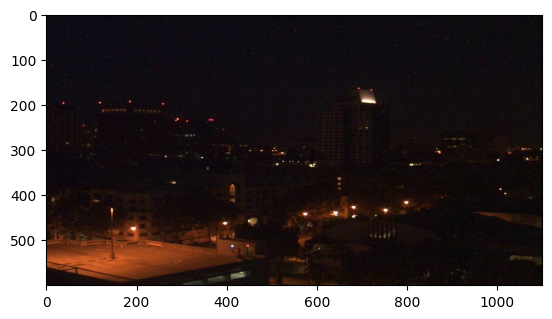

In [30]:
# Melakukan pengecekan avg brightness pada gambar acak

rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_bright = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Average brightness: {avg_bright}')
plt.imshow(feature_img)

# 5. Klasifikasi dengan Metode Threshold

In [31]:
# Function untuk melakukan predict

def predict_img(img, threshold):
    avg = avg_brightness(img)
    pred = 0
    
    if avg > threshold:
        pred = 1
    
    return pred

Image 179
Predicted label: 0
Actual label: 0


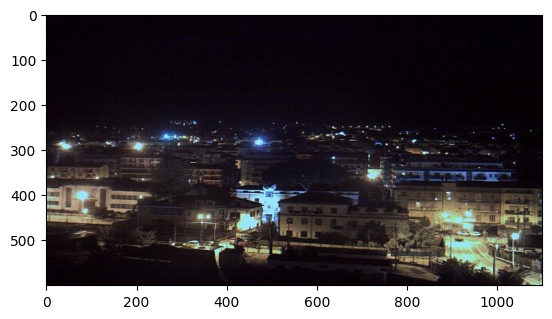

In [41]:
# Melakukan pengecekan prediksi pada gambar acak

random_pred = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[random_pred][0]

pred_label = predict_img(feature_img, 120)

print(f'Image {random_pred}')
print(f'Predicted label: {pred_label}')
print(f'Actual label: {train_std_img_list[random_pred][1]}')
plt.imshow(feature_img)

# 6. Evaluasi Model

In [42]:
# Function untuk melakukan evaluasi model

def evaluate(img_list, threshold):
    miss_labels = []
    
    for file in img_list:
        # Mendapatkan feature dan label img
        feature = file[0]
        label = file[1]
        
        # Melakukan prediksi terhadap label
        pred_label = predict_img(feature, threshold)
        
        # Melakukan komparasi antara prediksi dan label
        if label != pred_label:
            miss_labels.append((feature, label, pred_label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    acc = corr_pred / total_img
    
    print(f'Accuracy: {acc:.4f}')
    

In [46]:
# Melakukan pengecekan akurasi model
evaluate(train_std_img_list, 120)

Accuracy: 0.8417


In [47]:
# Melakukan pengujian terhadap data testing

test_img = load_img(test_dir)

test_std_img_list = preprocess_img(test_img)

evaluate(test_std_img_list, 120)

Accuracy: 0.8688


# 4. Alternatif - SVM

In [48]:
# Function untuk melakukan extract feature avg brightness

def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [49]:
# Melakukan extract avg brightness df untuk training

train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,94.553459,1.0
1,121.573408,1.0
2,142.108167,1.0
3,158.018809,1.0
4,115.034714,1.0


In [50]:
# Melakukan extract avg brightness pada df untuk testing

test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,159.288420,1.0
1,194.228062,1.0
2,144.243461,1.0
3,103.341517,1.0
4,104.136732,1.0


# 5. Alternatif - SVM

In [51]:
# import library svc
from sklearn.svm import SVC

# Melakukan splitting data training dan testing
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

# 6. Alternatif - SVM

In [52]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data training
y_train_pred = model.predict(X_train)

# Menghitung akurasi pada data training
acc_train = accuracy_score(y_train, y_train_pred)

# Membuat prediksi data dari data testing
y_test_pred = model.predict(X_test)

# Menghitung akurasi label predict
acc_test = accuracy_score(y_test, y_test_pred)

# PMenampilkan hasil akhir akurasi
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
